In [1]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.tsa.api as smt

##### Generate a time series for a moving average; see if we can detect it

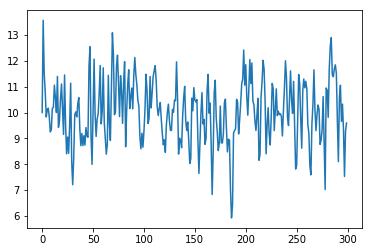

In [2]:
size=300
constant = 10.
Theta = 0.7
errors = np.random.normal(size=size,scale=1.0)
init = 10.0

series = [init]
for x in range(1,size):
    tmp = constant + errors[x] + Theta*errors[x-1]
    series.append(tmp)

plt.plot(series)
plt.show()

In [3]:
model = smt.ARMA(series, order=(0, 1))
max_lag=20
model = model.fit(maxlag=max_lag, method='mle', trend='nc')
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  300
Model:                     ARMA(0, 1)   Log Likelihood                -928.911
Method:                           mle   S.D. of innovations              5.329
Date:                Thu, 02 Aug 2018   AIC                           1861.823
Time:                        14:15:05   BIC                           1869.230
Sample:                             0   HQIC                          1864.787
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1.y        0.9596      0.016     59.668      0.000       0.928       0.991
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -1.0421           +0.0000j            1.0421            0.5000
-----------------------------------------------------------------------------
"""

In [4]:
train = series[:size-1]
test  = series[size-1]

In [ ]:
#print(model.__doc__)

In [5]:
lag      = model.k_ar
constant = model.params[0]
slope1   = model.params[1]
slope2   = model.params[2]
print("Optimum lag is {}".format(lag))
print ("Formula looks like:")
print("Y = {:.4f} + {:.4f}*(T-1) + {:.4f}*(T-2)".format(constant,slope1,slope2))

IndexError: index 1 is out of bounds for axis 0 with size 1

##### See how close the fitted slope matches the actual slope

In [ ]:
print("Fitted coefficients are {:.2%} of B1 and {:.2%} of B2".
      format(slope1/B1, slope2/B2))

In [ ]:
plt.plot(train,'b', label="Actual")
plt.plot(model.fittedvalues,'r', label="Fitted")
plt.legend(loc='best')
plt.show()

In [ ]:
plt.plot(model.resid)
plt.show()

#### Predict the last value

In [ ]:
# "prev" is the last few entries in the training data...enough to generate the
# first prediction
def getPreds(prev, model):
    constant = model.params[0]
    b1 = model.params[1]
    b2 = model.params[2]
    return constant + b1*prev[1] + b2*prev[0]

In [ ]:
prev = train[-2:]   # These are the 2 actuals used to predict the next value
prediction = getPreds(prev, model)

In [ ]:
print("Prediction is {:.4f}".format(prediction))
print("Test value is {:.4f}".format(test))
total = prediction + noise[299]
print("Prediction + error term is {:.4f}".format(total))
accuracy = test/total
print("So including the error term the prediction was {:.2%} accurate".format(accuracy))